In [2]:
!pip install pandas
import pandas as pd
import seaborn as sns


<Axes: xlabel='bmi', ylabel='charges'>

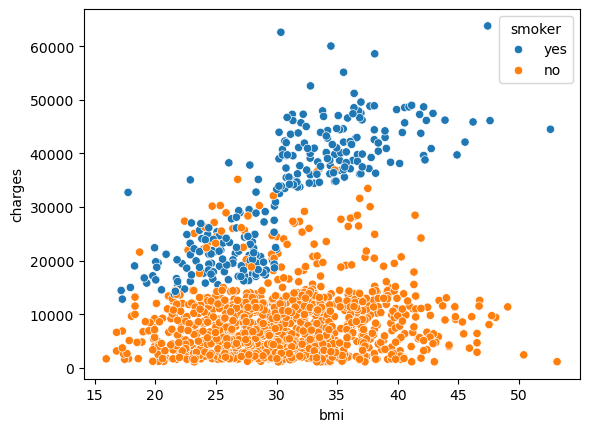

In [3]:
df=pd.read_csv("insurance.csv")
sns.scatterplot(x=df["bmi"],y=df["charges"],hue=df["smoker"])

In [6]:
X=df.drop(columns=["charges", "region"])

y=df["charges"]


In [7]:
X.head()

,age,sex,bmi,children,smoker
0,19,female,27.900,0,yes
1,18,male,33.770,1,no
2,28,male,33.000,3,no
3,33,male,22.705,0,no
4,32,male,28.880,0,no


In [8]:
X["sex"]=X["sex"].map({"female":1,"male":0})
X["smoker"]=X["smoker"].map({"yes":1,"no":0})
X.head()


,age,sex,bmi,children,smoker
0,19,1,27.900,0,1
1,18,0,33.770,1,0
2,28,0,33.000,3,0
3,33,0,22.705,0,0
4,32,0,28.880,0,0


In [9]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [10]:
X_train.head()

,age,sex,bmi,children,smoker
560,46,1,19.95,2,0
1285,47,1,24.32,0,0
1142,52,1,24.86,0,0
969,39,1,34.32,5,0
486,54,1,21.47,3,0


In [11]:
from sklearn.linear_model import LinearRegression

model =LinearRegression()
model.fit(X_train,y_train)  

LinearRegression()

In [12]:
y_pred=model.predict(X_test)


In [24]:
y_pred

array([ 8554.81711589,  6973.58746745, 36798.60416104,  9417.88282303,
       26871.68031081, 11097.38383938,   145.27608963, 16746.1683771 ,
         747.53414191, 11153.67590722, 28518.15016561,  9292.18345421,
        5460.51975119, 38510.48013003, 40359.30938604, 37223.40538064,
       15316.56711945, 36047.50032223,  9326.29049907, 31400.1559532 ,
        4269.64414373, 10464.66374097,  2719.9260555 ,  6579.53742551,
       11232.00255515, 12472.06793446, 14807.11281089,  6066.19283362,
        9535.69029723,  2377.6983797 ,  9475.05690885, 12963.23366722,
        4706.09057393,  3414.674504  ,  4815.64981654, 12484.17176954,
        2359.13614479,  9161.02061228, 33238.67621442, 32743.41702445,
        4274.58967205,  4229.5442107 , 14435.36485176, 11384.66898976,
        8925.70468583, 12480.09178788,  5154.45787816,  3554.10047649,
       35649.60942684,  9276.25523701, 15971.35991397,  2552.75200479,
       12162.99980138,  1062.65132285, 13551.43771934, 12103.65505529,
      

In [13]:
from sklearn.metrics import r2_score

r2=r2_score(y_test,y_pred)
print(r2)

0.7811302113434095


In [37]:
df1=pd.read_csv("insurance.csv")
X=df1.drop(columns=["charges"])
X["sex"]=X["sex"].map({"female":1,"male":0})
X["smoker"]=X["smoker"].map({"yes":1,"no":0})
X=pd.get_dummies(X, columns=["region"], drop_first=False,dtype=int)

y=df1["charges"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
model =LinearRegression()
model.fit(X_train,y_train)  

y_pred=model.predict(X_test)

r2=r2_score(y_test,y_pred)
print(r2)





0.7835929767120723


In [41]:
#using interaction feature to create new columns for with higher age and are smoker ,and  higher bmi and are smoker
df2=pd.read_csv("insurance.csv")
X=df2.drop(columns=["charges"])

X=pd.get_dummies(X, columns=["region"], drop_first=True,dtype=int)

X["sex"]=X["sex"].map({"female":1,"male":0})
X["smoker"]=X["smoker"].map({"yes":1,"no":0})


X["age_smoker"]=X["age"]*X["smoker"]
X["bmi_smoker"]=X["bmi"]*X["smoker"]
X.head(
)


,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest,age_smoker,bmi_smoker
0,19,1,27.900,0,1,0,0,1,19,27.9
1,18,0,33.770,1,0,0,1,0,0,0.0
2,28,0,33.000,3,0,0,1,0,0,0.0
3,33,0,22.705,0,0,1,0,0,0,0.0
4,32,0,28.880,0,0,1,0,0,0,0.0


In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model=LinearRegression()
model.fit(X_train,y_train)



LinearRegression()

In [43]:
y_pred=model.predict(X_test)
print(y_pred)

[11244.92252985  7419.09613036 33108.56263345 10825.70349972
 28165.83120369  6492.30055169  2795.33432583 14417.81581562
  5687.02991028 11674.71358693 20657.59012262  9146.41694187
  5695.47866425 51922.27364821 52110.34418673 46640.17211168
 11685.28405314 43258.65742309 10134.76643993 27544.17451838
  5590.71503071  9112.26016698  1829.43896788  4568.33364842
 12451.66624573 12838.44659475 13233.15939348  6449.57806469
 11799.9498717   1825.10642493  9707.98622109 12978.53418336
  3236.11758774  7025.39527005  4125.34618621 10091.32699237
  3262.60876705  9119.59871467 26284.74334712 37686.43163646
  4634.27512745  3702.06635756 12658.69778308 12849.08764218
  6810.63583482 12752.76878332  4474.37122331  5198.08817694
 41615.58170738  6338.51473147 14310.53229154  2272.59249937
  9166.71958047  2711.80386028 11905.92268657 12175.67773632
  5854.02670898 36417.51258036 12666.40484692 12587.08968911
 13954.80184     6697.59735566 14380.51190716  9820.68007771
 12275.66910022  5695.11

In [44]:
r2=r2_score(y_test,y_pred)
print(r2)

0.865231697953168


In [47]:
y_train_pred=model.predict(X_train)
r2_train_pred=r2_score(y_train,y_train_pred)

print(r2,r2_train_pred)


0.865231697953168 0.8340713711218875
